### WEB CRUSADERS

Enter the district name:  Bidar


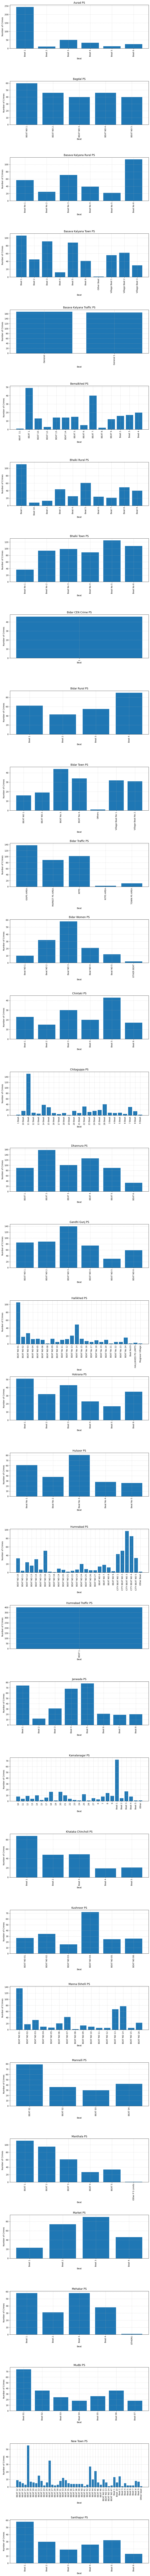

In [1]:
#importing necessary modules
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Read the CSV file using Dask
df = dd.read_csv('Tool2.csv')

# Prompt user to enter the district name
selected_district = input("Enter the district name: ")

# Filter the DataFrame based on the selected district
df_selected_district = df[df['District_Name'] == selected_district]

# Group the filtered DataFrame by 'UnitName' and 'Beat' and calculate the size of each group
df_crime = df_selected_district.groupby(['UnitName', 'beat']).size().reset_index().compute()

# List of unit names to plot
unit_names_to_plot = df_crime['UnitName'].unique()

# Create subplots for each unit name
num_rows = len(unit_names_to_plot)
fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows*5))

# Iterate over each unit name and plot beat-wise crime distribution
for i, unit_name in enumerate(unit_names_to_plot):
    # Filter data for the current unit name
    data_unit = df_crime[df_crime['UnitName'] == unit_name]
    
    # Extract beat and crime count data
    x = data_unit['beat']
    y = data_unit[data_unit.columns[-1]]  # Assume the last column is the count data

    # Plot beat-wise crime distribution for the current unit name
    axes[i].bar(x, y)
    axes[i].set_title(unit_name)  # Set subplot title as unit name
    axes[i].set_xlabel('Beat')
    axes[i].set_ylabel('Number of Crimes')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    axes[i].grid(which='both', linestyle=':')

# Adjust layout
plt.tight_layout()

# Save the plots as a PDF file
plt.savefig('crime_distribution_plots.pdf')

# Show the plots
plt.show()